<a href="https://colab.research.google.com/github/Peksyaji/Data_Mining_and_BI/blob/main/DatMin4_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statment
**Ashrae - Great Energy Predictor**:
*   Ashrae adalah suatu organisasi di bidang lingkungan yang bertujuan untuk menciptakan lingkungan yang sehat dan berkelanjutan.
*   Anda adalah seorang data analyst yang bekerja untuk melihat seberapa besar energi listrik yang digunakan oleh suatu gedung pencakar langit di musim panas untuk dapat melakukan efisiensi dalam penggunaan energi listrik.
*   Anda ditugaskan untuk membentuk model regresi dan menganalisis korelasi antara varibael independen dan meter_reading untuk memberikan rekomendasi yang dapat dilakukan untuk mengurangi penggunaan listrik yang sejalan dengan misi organisasi Ashrae.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv')
df.head()

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


# Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


In [4]:
print(set(df['primary_use']))

{'Food sales and service', 'Public services', 'Retail', 'Lodging/residential', 'Utility', 'Religious worship', 'Services', 'Technology/science', 'Entertainment/public assembly', 'Education', 'Manufacturing/industrial', 'Other', 'Parking', 'Warehouse/storage', 'Healthcare', 'Office'}


In [5]:
# Cek duplikasi data
df.duplicated().sum()

0

## Missing value

In [6]:
# Cek presentase missing value
df.isnull().sum()/len(df)*100

meter_reading          0.000000
primary_use            0.000000
square_feet            0.000000
year_built            53.078556
floor_count           75.088464
air_temperature        0.000000
cloud_coverage         1.203114
dew_temperature        0.000000
precip_depth_1_hr     12.455768
sea_level_pressure     6.298655
wind_direction         0.000000
wind_speed             0.000000
dtype: float64

In [7]:
'''
Terlihat bahwa "year_build" dan "floor_count" memiliki missing value yang besar secara presentase,
maka dari itu, kami akan menghapus dua variabel tersebut dari dataset
'''
df.drop(['year_built','floor_count'], axis=1, inplace=True)

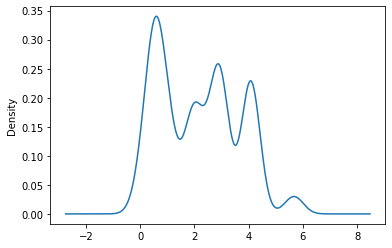

In [8]:
# Cek distribusi 'cloud_coverage'
df['cloud_coverage'].plot(kind='density')

In [9]:
'''
Karena distribusi data pada variabel 'cloud_coverage' tidak memiliki kecenderungan condong ke kiri atau ke kanan,
maka kami mengisi missing value dengan nilai mean data
'''
df['cloud_coverage'] = df['cloud_coverage'].fillna(df['cloud_coverage'].mean())

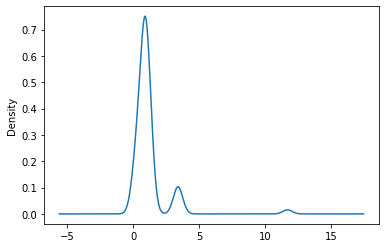

In [10]:
# Cek distribusi 'precip_depth_1_hr'
df['precip_depth_1_hr'].plot(kind='density')

In [11]:
'''
Karena distribusi data pada variabel 'precip_depth_1_hr' memiliki kecenderungan condong ke kiri,
maka kami mengisi missing value dengan nilai median data
'''
df['precip_depth_1_hr'] = df['precip_depth_1_hr'].fillna(df['precip_depth_1_hr'].median())

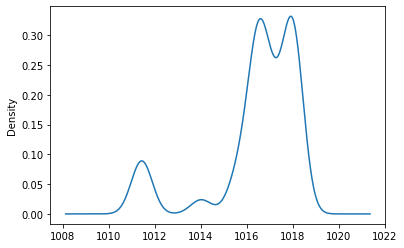

In [12]:
# Cek distribusi 'sea_level_pressure'
df['sea_level_pressure'].plot(kind='density')

In [13]:
'''
Karena distribusi data pada variabel 'sea_level_pressure' memiliki kecenderungan condong ke kanan,
maka kami mengisi missing value dengan nilai median data
'''
df['sea_level_pressure'] = df['sea_level_pressure'].fillna(df['sea_level_pressure'].median())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   air_temperature     1413 non-null   float64
 4   cloud_coverage      1413 non-null   float64
 5   dew_temperature     1413 non-null   float64
 6   precip_depth_1_hr   1413 non-null   float64
 7   sea_level_pressure  1413 non-null   float64
 8   wind_direction      1413 non-null   float64
 9   wind_speed          1413 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 110.5+ KB


# EDA&Visualisasi

In [15]:
# Banyak penggunaan gedung tiap kategori
df['primary_use'].value_counts()

Education                        537
Office                           269
Entertainment/public assembly    179
Public services                  155
Lodging/residential              145
Other                             25
Parking                           22
Healthcare                        21
Warehouse/storage                 12
Retail                            11
Manufacturing/industrial          10
Services                           9
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

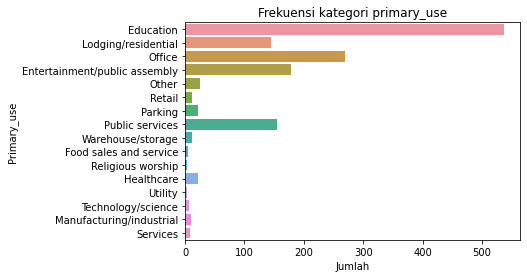

In [16]:
sns.countplot(data=df, y = 'primary_use')
plt.title("Frekuensi kategori primary_use")
plt.xlabel('Jumlah')
plt.ylabel('Primary_use')
plt.show()

Dari grafik di atas, terlihat bahwa record yang disimpan paling banyak adalah gedung yang digunakan sebagai tempat Education, yaitu sebanyak 537 bangunan. Kemudian empat bangunan lain yang record-nya tinggi adalah Office, Entertaiment/publict assembly, Public services, dan Lodging/residential.

[]

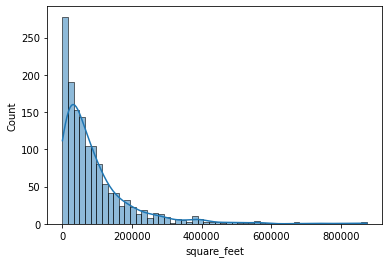

In [17]:
sns.histplot(data=df, x='square_feet', kde=True)
plt.plot()

Terlihat dari grafik di atas bahwa banyaknya bangunan yang terrecord menurun sejalan dengan kenaikan luas bangunan.

Mayoritas bangunan berdiri dengan luas bangunan di bawah 200000 kaki persegi.

[]

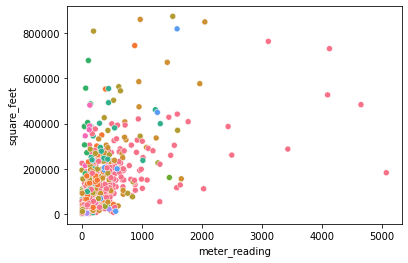

In [18]:
sns.scatterplot(data=df, x='meter_reading', y='square_feet', hue='primary_use', legend=False)
plt.plot()

1. Terlihat bahwa bangunan cenderung memiliki luas bangunan di bawah 200000 kaki persegi dan memiliki penggunaan listrik sebesar 0-1000 kWh.
2. Terdapat bangunan dengan luas bangunan yang cenderung kecil tetapi mengonsumsi listrik dengan sangat tinggi.
3. Terdapat bangunan dengan luas bangunna yang tinggi, tetapi mengonsumsi daya yang cenderung rendah.

[]

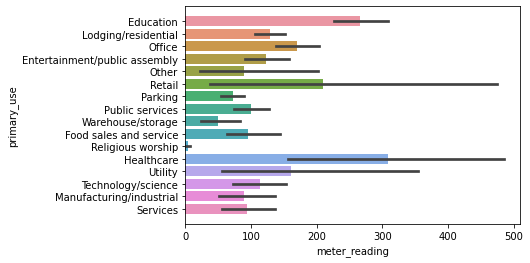

In [19]:
sns.barplot(data=df, x='meter_reading', y='primary_use')
plt.plot()

[]

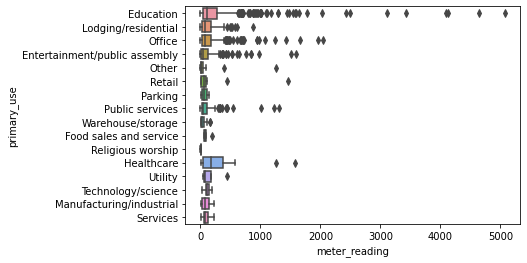

In [20]:
sns.boxplot(data=df, x='meter_reading', y='primary_use')
plt.plot()

Dilihat dari grafik di atas, Healtcare, Retail, dan Education menjadi penggunaan listrik terbanyak. Terlihat pula untuk Healtcare, Retail, Utility, dan Other memiliki outier yang jaraknya jauh dari rata-ratanya.

[]

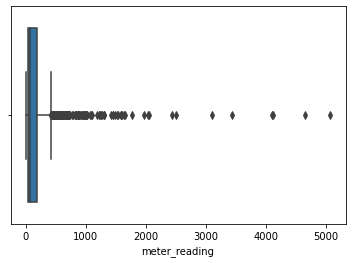

In [21]:
sns.boxplot(data=df, x='meter_reading')
plt.plot()

Terlihat dari boxplot di atas bahwa pada variabel 'meter_reading' terdapat banyak outlier. Hal ini berarti bahwa sesungguhnya kebanyakan bangunan mengonsumsi listrik dengan rendah dan ada beberapa yang menggunakan listrik secara di luar kebiasaan bangunan lain. Oleh karena itu, kami memutuskan untuk menghapus outlier dari data

## Mengatasi Outlier

In [22]:
df_sub = df.loc[:, 'meter_reading']
# Filter iqr: dalam 2,22 IQR
iqr = df_sub.quantile(0.75) - df_sub.quantile(0.25)
lim = np.abs((df_sub - df_sub.median()) / iqr) < 2.22
# Mengganti outliers dengan nan
df.loc[:, 'meter_reading'] = df_sub.where(lim, np.nan)

In [23]:
df.dropna(inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1258 non-null   float64
 1   primary_use         1258 non-null   object 
 2   square_feet         1258 non-null   int64  
 3   air_temperature     1258 non-null   float64
 4   cloud_coverage      1258 non-null   float64
 5   dew_temperature     1258 non-null   float64
 6   precip_depth_1_hr   1258 non-null   float64
 7   sea_level_pressure  1258 non-null   float64
 8   wind_direction      1258 non-null   float64
 9   wind_speed          1258 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 108.1+ KB


# Pemodelan regresi

[]

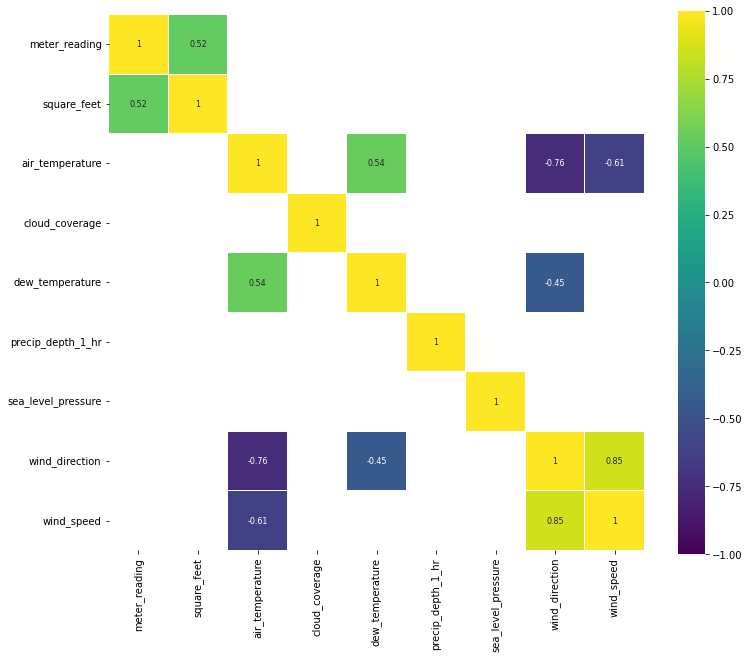

In [25]:
# HeatMap untuk menyelidiki korelasi
corr = df.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
 cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
 annot=True, annot_kws={"size": 8}, square=True)
plt.plot()

Interpretasi heatmap:

- Nilai korelasi antar meter_reading (Y) dan square feet (variabel independen) menunjukan bahwa ada korelasi linier positif yang cukup kuat anatara meter reading dan square feet, ada kecenderungan bahwa nilai luas yang tinggi berkaitan dengan penggunaan listrik yang lebih tinggi dibandingkan luas square feet yang rendah

- Dari heatmap kita dapat melihat juga korelasi antar variabel independen (multikolinearitas) dapat dilihat bahwa variabel 'wind_speed' berkorelasi cukup tinggi dengan 'air_temperature' dan 'wind_direction'. Selain itu, variabel 'air temperature' berkorelasi cukup tinggi dengan 'wind_direction' dan 'dew_temperature'.

In [26]:
# Cek nilai VIF untuk mengetahui multikolieritas
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
numerik = df[['meter_reading','square_feet','air_temperature','cloud_coverage',
           'dew_temperature','precip_depth_1_hr','sea_level_pressure',
         'wind_direction','wind_speed']]
vif = pd.DataFrame()
vif['variabel'] = numerik.columns
  
# Menghitung VIF untuk tiap variabel
vif['VIF'] = [variance_inflation_factor(numerik.values, i) for i in range(len(numerik.columns))]
  
vif

,variabel,VIF
0,meter_reading,2.810713
1,square_feet,2.614641
2,air_temperature,34.374906
3,cloud_coverage,5.115313
4,dew_temperature,7.398453
5,precip_depth_1_hr,2.675656
6,sea_level_pressure,267.850257
7,wind_direction,325.995392
8,wind_speed,147.366410


Karena nilai VIF  untuk variabel 'air_temperature', 'sea_level_pressure', 'wind_direction', dan 'wind_speed' bernilai lebih dari 10, maka variabel tersebut memiliki masalah multikolinieritas. Terdapat beberapa cara untuk mengatasi multikolinieritas, diantaranya adalah:
1. Menghapus variabel yang berkorelasi
2. Melakukan standarisasi
3. Melakukan transformasi variabel
4. Principal Component Analysis (PCA)

## Mengatasi Multikolinieritas
Kali ini kami akan menggunakan metode penghapusan variabel yang berkorelasi

In [27]:
# Cek nilai VIF untuk mengetahui multikolieritas
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
numerik = df[['meter_reading','square_feet','air_temperature','cloud_coverage',
           'dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_speed']] # Menghapus wind_direction
vif = pd.DataFrame()
vif['variabel'] = numerik.columns
  
# Menghitung VIF untuk tiap variabel
vif['VIF'] = [variance_inflation_factor(numerik.values, i) for i in range(len(numerik.columns))]
  
vif

,variabel,VIF
0,meter_reading,2.806869
1,square_feet,2.594746
2,air_temperature,32.263794
3,cloud_coverage,4.843403
4,dew_temperature,6.510616
5,precip_depth_1_hr,2.673281
6,sea_level_pressure,132.338416
7,wind_speed,64.961793


In [28]:
# Cek nilai VIF untuk mengetahui multikolieritas
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
numerik = df[['meter_reading','square_feet','air_temperature','cloud_coverage',
           'dew_temperature','precip_depth_1_hr','wind_speed']] # Menghapus sea_level_pressure
vif = pd.DataFrame()
vif['variabel'] = numerik.columns
  
# Menghitung VIF untuk tiap variabel
vif['VIF'] = [variance_inflation_factor(numerik.values, i) for i in range(len(numerik.columns))]
  
vif

,variabel,VIF
0,meter_reading,2.790595
1,square_feet,2.549199
2,air_temperature,9.572550
3,cloud_coverage,3.931799
4,dew_temperature,6.299824
5,precip_depth_1_hr,2.132752
6,wind_speed,8.646100


In [29]:
# Menghapus sea_level_pressure dan wind_direction
lm = smf.ols('meter_reading ~ C(primary_use)+ square_feet + air_temperature	+ cloud_coverage + dew_temperature + precip_depth_1_hr + wind_speed',
             data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     35.19
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          4.60e-110
Time:                        11:13:31   Log-Likelihood:                -7213.6
No. Observations:                1258   AIC:                         1.447e+04
Df Residuals:                    1236   BIC:                         1.458e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Interpretasi hasil regresi:
* Adj. R-squared = 0.364, artinya model hanya mampu menjelaskan variansi data sebesar 36.2%
* Prob (F-statistic) = 4.60e-110, karena nilainya < 0.05, maka data dinyatakan signifikan secara statistik
* Prob(JB) = 1.00e-227, artinya residual berdistribusi normal
* Terdapat masalah multikolinieritas yang ditunjukkan oleh conditional number = 2.23e+06, sehingga berakibat pada tidak valid nya interpretasi nilai beta

In [30]:
# Stepwise forward
def forward_selected(df, response):
    remaining = set(df.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,' + '.join(selected + [candidate]))
            score = smf.ols(formula, df).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, df).fit()
    return model

In [31]:
df1 = df[['meter_reading','primary_use','square_feet','air_temperature','cloud_coverage',
           'dew_temperature','precip_depth_1_hr','wind_speed']]
model = forward_selected(df1, 'meter_reading')
print(model.model.formula)
print(model.summary())

meter_reading ~ square_feet + primary_use + dew_temperature + precip_depth_1_hr + cloud_coverage + wind_speed + 1
                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     36.97
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          7.75e-111
Time:                        11:13:32   Log-Likelihood:                -7213.6
No. Observations:                1258   AIC:                         1.447e+04
Df Residuals:                    1237   BIC:                         1.458e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0

# Kesimpulan dan Saran :
- Secara garis besar data yang diberikan, masih kurang baik karena masih terdapat banyak missing values.

- Terdapat koefisien positif untuk variabel square feet, cloud coverage, dew temperature, dan precipt depth 1 hr yang mempengaruhi kenaikan listrik. Sedangkan variabel wind_speed berkoefisien negatif yang artinya semakin cepat angin di suatu tempat, maka penggunaan listrik akan menurun.

- Terdapat outlier pada data

- Untuk melihat meter_reading sebagai variabel dependen, dihapuskan 2 variabel dari yang diberikan yaitu variabel year_built dan floor_counts karena terlalu banyak missing values yang didapatkan

- Jika sebuah instansi edukasi, kesehatan, dan retail ingin membuat sebuah bangunan maka perlu dipersiapkan dana yang cukup besar karena penggunaan listrik dari ke-3 sektor tersebut cukup tinggi diantara sektor lainnya.

- Jika sebuah konstruksi ingin membuat sebuah bangunan yang memiliki luas bangunan yang cukup besar, maka perlu dipersiapkan daya listrik yang cukup besar pula, karena terdapat korelasi yang positif dan cukup besar antara keduanya.